In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv', low_memory=False)

In [3]:
df.describe()

,LowestSalary,HighestSalary
count,149999.000000,149999.000000
mean,66.231108,125.859559
std,54.323570,204.858848
min,0.000000,30.000000
25%,30.000000,40.000000
50%,60.000000,70.000000
75%,100.000000,120.000000
max,200.000000,999.000000


# Question 2

### Find average salaries

In [4]:
jobs = df[['Title', 'LowestSalary', 'HighestSalary']].copy()

In [5]:
jobs['AverageSalary'] = jobs.mean(axis=1).astype(int)

### Clean Id column

In [6]:
df['Id'] = df['Id'].astype(str)

In [7]:
df['Id'] = df['Id'].str.slice(0, 8, 1)

In [8]:
df.loc[149969, 'Id']

'38084492'

### Clean Date column

In [9]:
df.Date.dtypes

dtype('O')

In [10]:
df.loc[149969, 'Date']

'2019-01-11T00:00:00.000Z'

In [11]:
df['Date'] = df['Date'].str.slice(0, 10, 1)

In [12]:
df.loc[1, 'Date']

'2018-10-30'

### Convert Date to datetime and Id to int

In [13]:
df['Id'] = df['Id'].astype(int)

In [14]:
df.loc[10, 'Id']

37593836

In [15]:
df.loc[10, 'Date']

'2018-10-30'

In [16]:
df['Date'] =  pd.to_datetime(df['Date'])

In [17]:
df.loc[1, 'Date']

Timestamp('2018-10-30 00:00:00')

# Question 3

### Bar chart - avg salary

In [18]:
average_salary = jobs.groupby('AverageSalary').count()

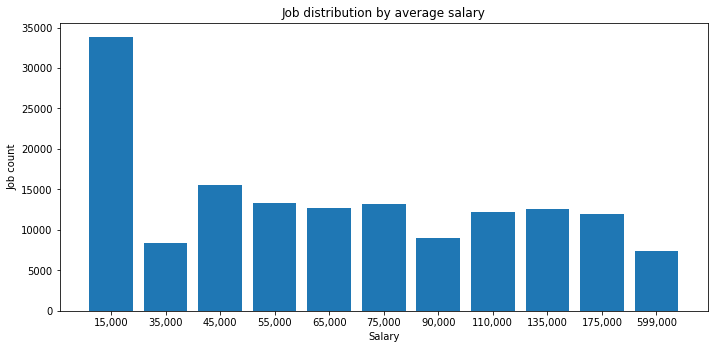

In [19]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1.5, 1])
plt.xlabel('Salary')
plt.ylabel('Job count')
plt.title('Job distribution by average salary')
x = [str(i) + ',000' for i in average_salary.index]
y = [i for i in average_salary['Title']]
plt.bar(x, y, align='center')
plt.show()

### Pie chart - job types

In [20]:
job_types = df[['JobType']].copy()
job_types.isnull().values.any()

True

In [21]:
job_types.dropna(inplace = True)
job_types.isnull().values.any()

False

In [22]:
job_types['count'] = job_types.groupby('JobType')['JobType'].transform('count')

In [23]:
job_types.drop_duplicates(keep = 'first', inplace = True)

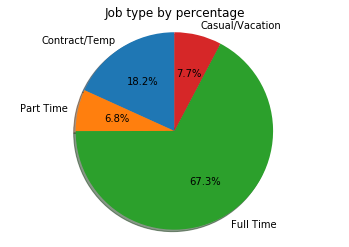

In [24]:
labels = [x for x in job_types['JobType']]
counts = [x for x in job_types['count']]
fig, ax = plt.subplots()
ax.pie(counts, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
plt.title('Job type by percentage')
plt.show()

# Question 4

### Bar charts - market size by city

In [25]:
market_size = df[['Location']].copy()

In [26]:
market_size['count'] = market_size.groupby('Location')['Location'].transform('count')

In [27]:
market_size.drop_duplicates(keep = 'first', inplace = True)

In [28]:
market_size.sort_values(by=['count'], inplace = True)

In [29]:
market_size.isnull().values.any()

True

In [30]:
market_size.dropna(inplace = True)

In [31]:
market_size.isnull().values.any()

False

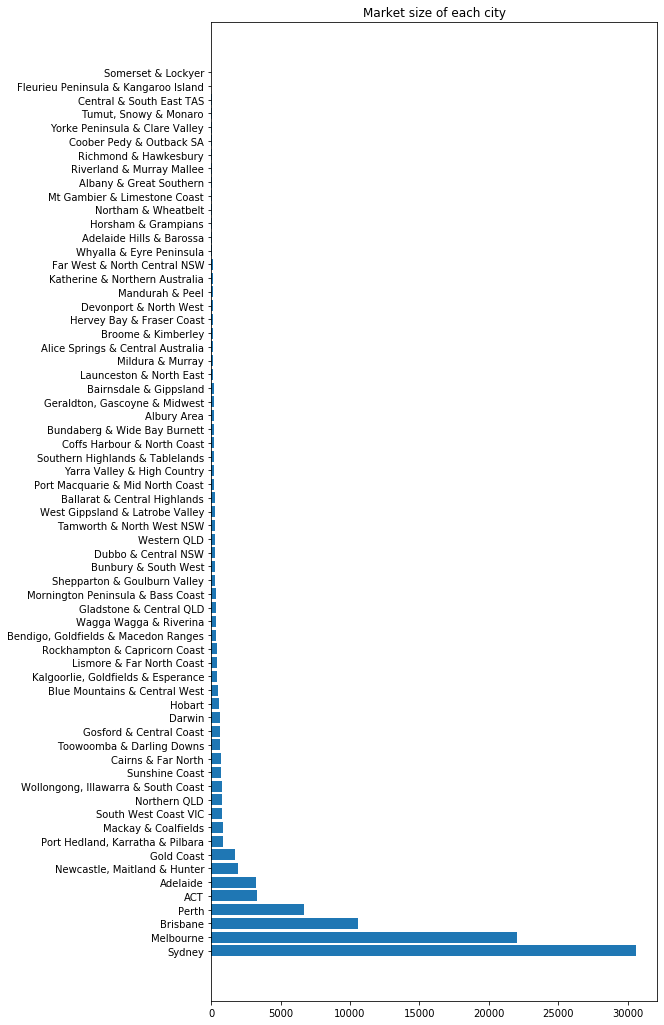

In [74]:
fig, ax = plt.subplots(figsize=(8,18))
cities = [x for x in market_size['Location']]
jobs = [x for x in market_size['count']]
ax.barh(cities, jobs, align='center')
plt.title('Market size of each city')
plt.show()

### Pie chart - Market share by city

In [33]:
market_size.sort_values(by=['count'], ascending=False, inplace = True)

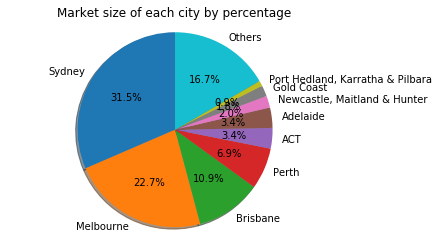

In [34]:
biggest_cities = [x for x in market_size['Location']][:9]
biggest_cities_counts = [x for x in market_size['count']][:9]
biggest_cities.append('Others')
biggest_cities_counts.append(sum(jobs)-sum(biggest_cities_counts))
fig, ax = plt.subplots()
ax.pie(biggest_cities_counts, labels=biggest_cities, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
plt.title('Market size of each city by percentage')
plt.show()

### Box plot - Salary distibution amongst cities

In [35]:
salaries = df[['Location', 'LowestSalary', 'HighestSalary']].copy().groupby('Location')

In [36]:
biggest_cities = [x for x in market_size['Location']][:10]
box_plot_data = []
for city in biggest_cities:
    x = salaries.get_group(city)
    low = x['LowestSalary'].tolist()
    high = x['HighestSalary'].tolist()
    box_plot_data.append(low + high)

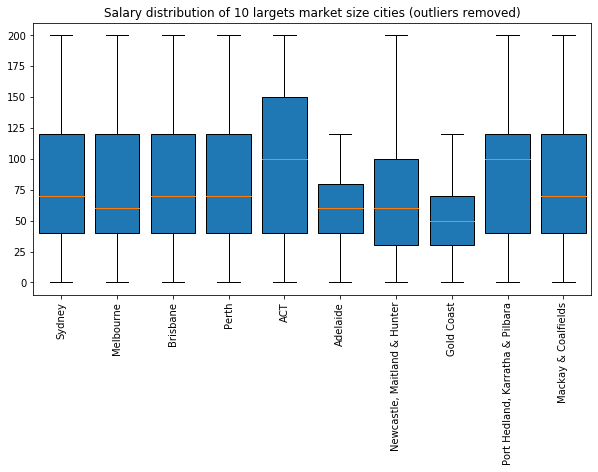

In [37]:
fig, ax = plt.subplots(figsize=(10,5))
ax.boxplot(box_plot_data,patch_artist=True,labels=biggest_cities, sym='', widths=(.8))
plt.xticks(rotation=90)
plt.title('Salary distribution of 10 largets market size cities (outliers removed)')
plt.show()

# Question 5

### Bar chart - Postings by sector

In [38]:
job_sector = df[['Classification']].copy()
job_sector['count'] = job_sector.groupby('Classification')['Classification'].transform('count')
job_sector.drop_duplicates(keep = 'first', inplace = True)
job_sector.sort_values(by=['count'], inplace = True)
job_sector.dropna(inplace = True)

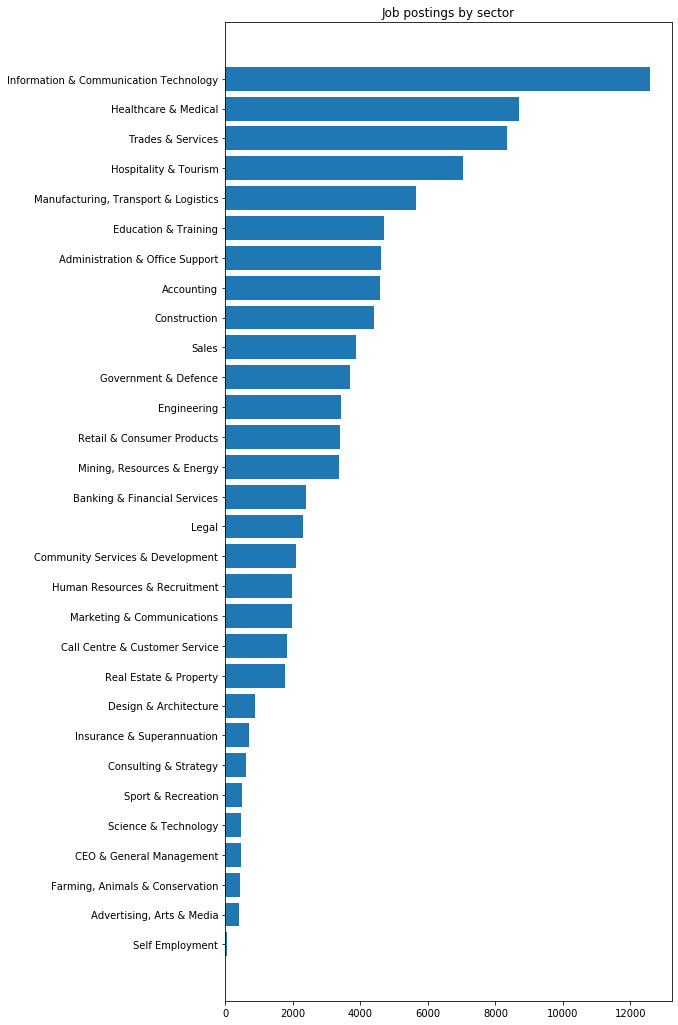

In [39]:
fig, ax = plt.subplots(figsize=(8,18))
sectors = [x for x in job_sector['Classification']]
count = [x for x in job_sector['count']]
ax.barh(sectors, count, align='center')
plt.title('Job postings by sector')
plt.show()

### Subsector analysis

In [40]:
sector_salaries  = df[['Classification', 'SubClassification', 'LowestSalary', 'HighestSalary']].copy().groupby('Classification')

In [41]:
box_plot_data = []
sectors = [x for x in job_sector['Classification']]
#sectors = [x for x in sector_salaries['Classification']]
for sector in sectors:
    x = sector_salaries.get_group(sector)
    low = x['LowestSalary'].tolist()
    high = x['HighestSalary'].tolist()
    box_plot_data.append(low + high)

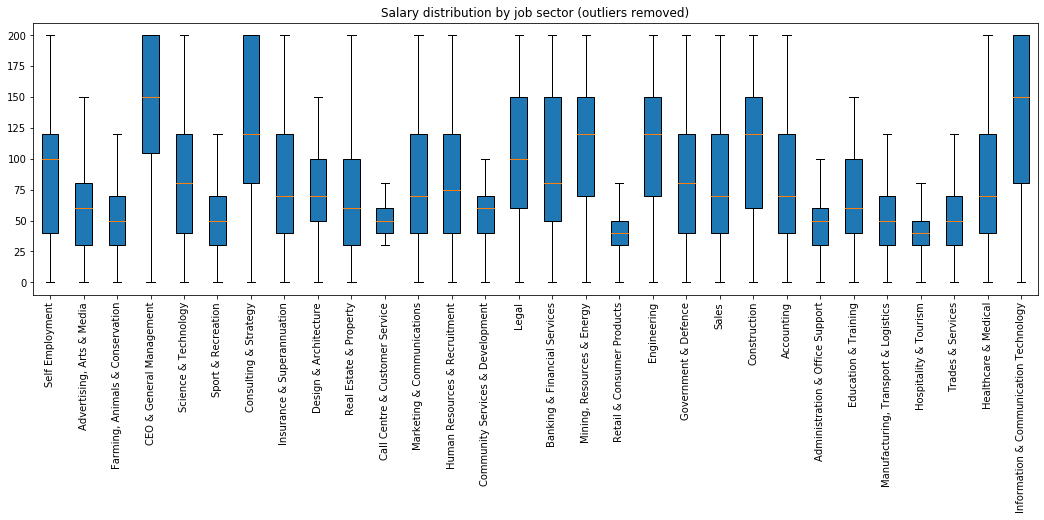

In [42]:
fig, ax = plt.subplots(figsize=(18,5))
ax.boxplot(box_plot_data,patch_artist=True,labels=sectors, sym='', widths=(.5))
plt.xticks(rotation=90)
plt.title('Salary distribution by job sector (outliers removed)')
plt.show()

In [87]:
sect_tops = df[['Classification', 'SubClassification', 'LowestSalary', 'HighestSalary']].copy()

In [97]:
counted_sections = sect_tops.groupby(['Classification', 'SubClassification']).size().reset_index(name='count')
top_subs = counted_sections.sort_values('count', ascending=False).drop_duplicates('Classification').sort_index()
counted_sections.sort_values('Classification', ascending=True, inplace=True)

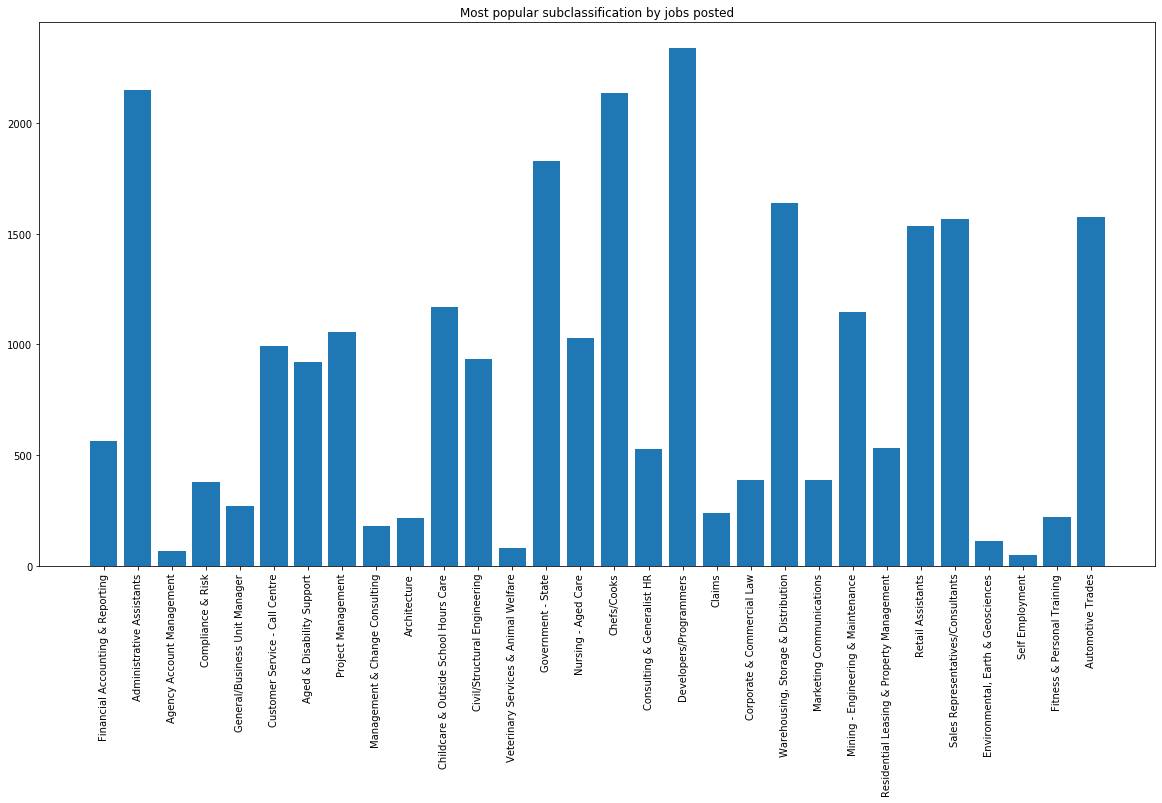

In [117]:
fig, ax = plt.subplots(figsize=(20,10))
subsectors = [x for x in top_subs['SubClassification']]
count = [x for x in top_subs['count']]
ax.bar(subsectors, count, align='center')
plt.xticks(rotation=90)
plt.title('Most popular subclassification by jobs posted')
plt.show()

In [119]:
salary_sub = sect_tops.groupby(['SubClassification'])

In [150]:
box_plot_data = []
#sectors = [x for x in top_subs]
sectors = [x for x in top_subs['SubClassification']]
for sector in sectors:
    x = salary_sub.get_group(sector)
    low = x['LowestSalary'].tolist()
    high = x['HighestSalary'].tolist()
    box_plot_data.append(low + high)

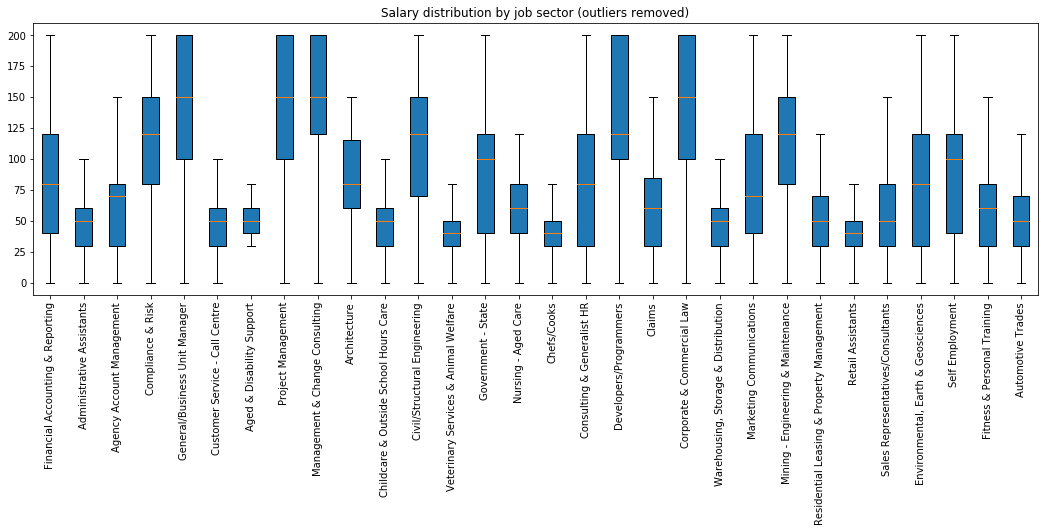

In [153]:
fig, ax = plt.subplots(figsize=(18,5))
ax.boxplot(box_plot_data,patch_artist=True,labels=sectors, sym='', widths=(.5))
plt.xticks(rotation=90)
plt.title('Salary distribution by job sector (outliers removed)')
plt.show()

TypeError: string indices must be integers

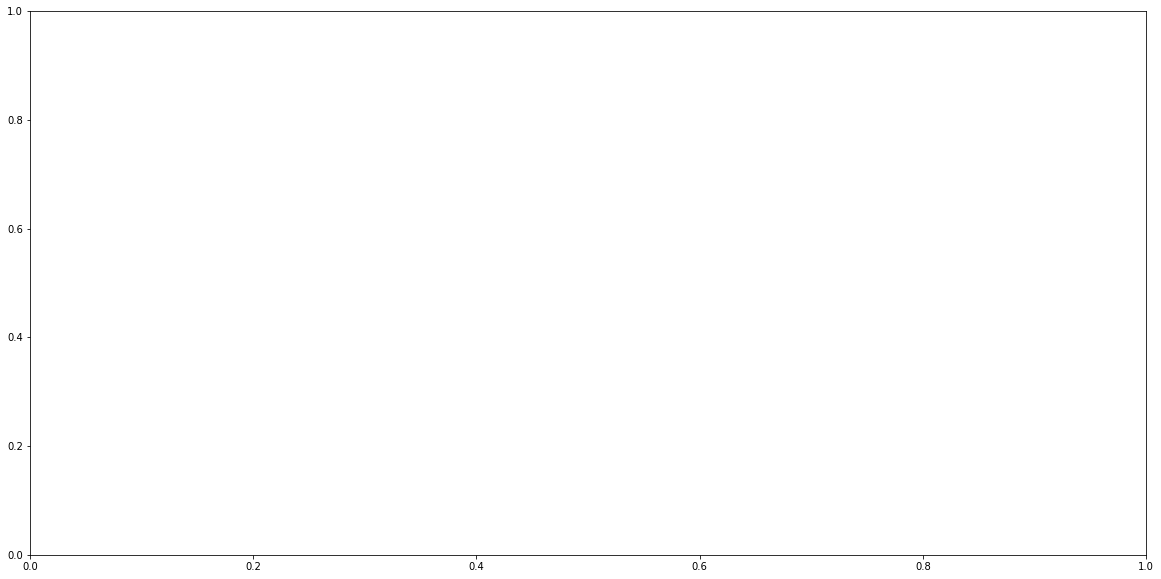

In [155]:
fig, ax = plt.subplots(figsize=(20,10))
subsectors = [x for x in top_subs['SubClassification']]
highest_salary = []
for salary in salary_sub.get_group(sector):
    highest_salary.append(salary['HighestSalary'].max())
ax.bar(subsectors, highest_salary, align='center')
plt.xticks(rotation=90)
plt.title('Most popular subclassification by jobs posted')
plt.show()